In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import statsmodels.api as sm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('furniture.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
furniture = df[['Order Date','Quantity']]
furniture.head()

,Order Date,Quantity
0,2016-11-08,2
1,2016-11-08,3
2,2015-10-11,5
3,2014-06-09,7
4,2014-06-09,9


In [4]:
furniture.dtypes
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'], format='mixed')

In [5]:
furniture.sort_values("Order Date")
furniture.isnull().sum()

Order Date    0
Quantity      0
dtype: int64

In [6]:
furniture = furniture.groupby('Order Date')['Quantity'].sum().reset_index()

In [7]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

<Axes: xlabel='Order Date'>

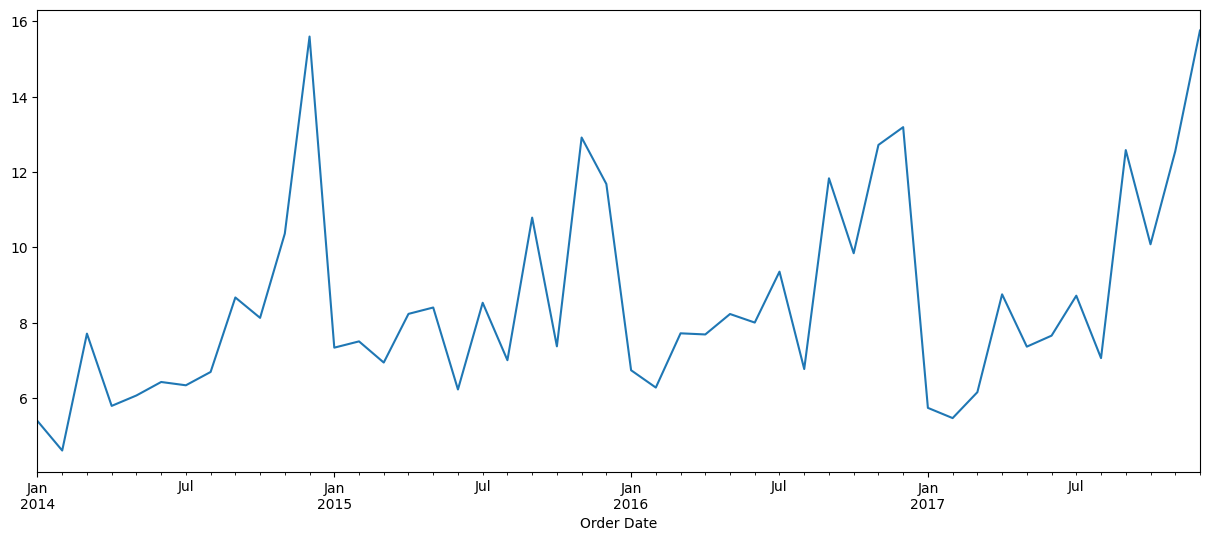

In [8]:
y = furniture['Quantity'].resample('MS').mean()
y.plot(figsize=(15,6))

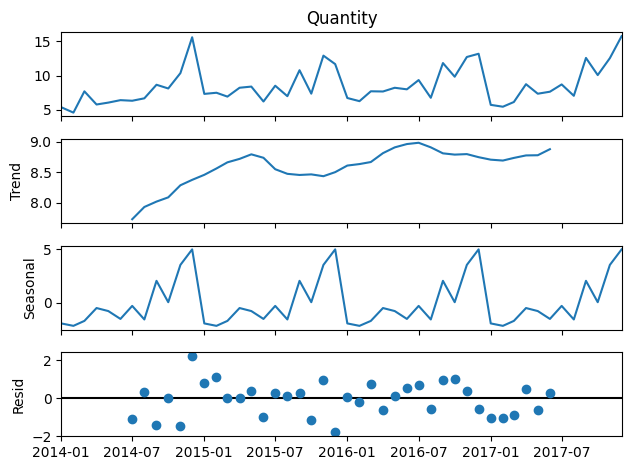

In [9]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

In [10]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {} '.format(pdq[1], seasonal_pdq[1]))
print('{} x {} '.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12) 
(0, 1, 0) x (0, 1, 0, 12) 


In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationary=False, enforce_invertibility= False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:348.6914980271735
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2065.711313846988
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:135.6006279287702
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:136.34556759131493
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:223.7139849487691
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2050.255412165802
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:137.03791276230314
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:137.39904010513604
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:308.34235604500077
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2059.5548133035722
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:137.5673664173221
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:138.16394561442476
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:224.24932574873395
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1738.2293379892199
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:139.02574739917492
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:139.3286023470625
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:234.58416586592384
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2075.081315424997
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1

In [12]:
train_data = y['2014-01-01':'2017-05-01']

In [13]:
model = sm.tsa.statespace.SARIMAX(train_data, order=(1,1,1),seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5321      0.399      1.334      0.182      -0.250       1.314
ma.L1         -1.0090      3.518     -0.287      0.774      -7.905       5.887
ar.S.L12      -0.4020      0.141     -2.841      0.004      -0.679      -0.125
sigma2         1.0274      4.072      0.252      0.801      -6.954       9.009


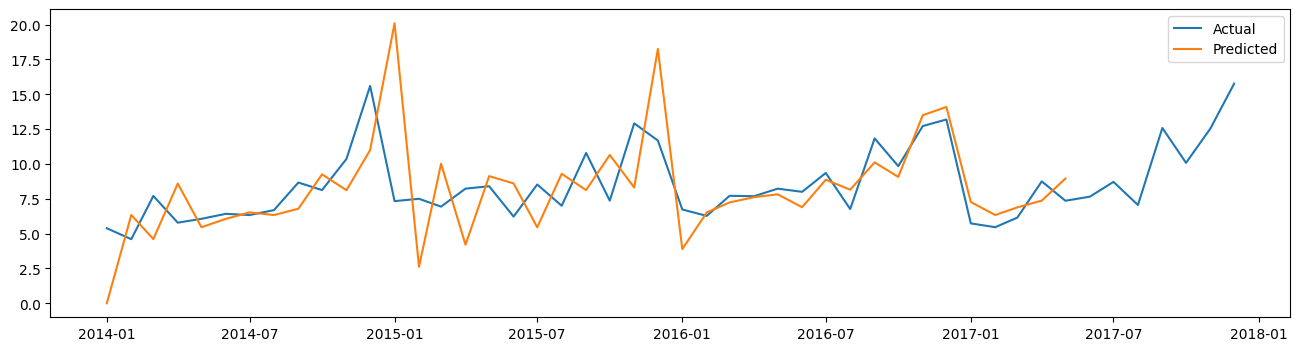

In [14]:
predictions = results.predict()

plt.figure(figsize=(16,4))
plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()

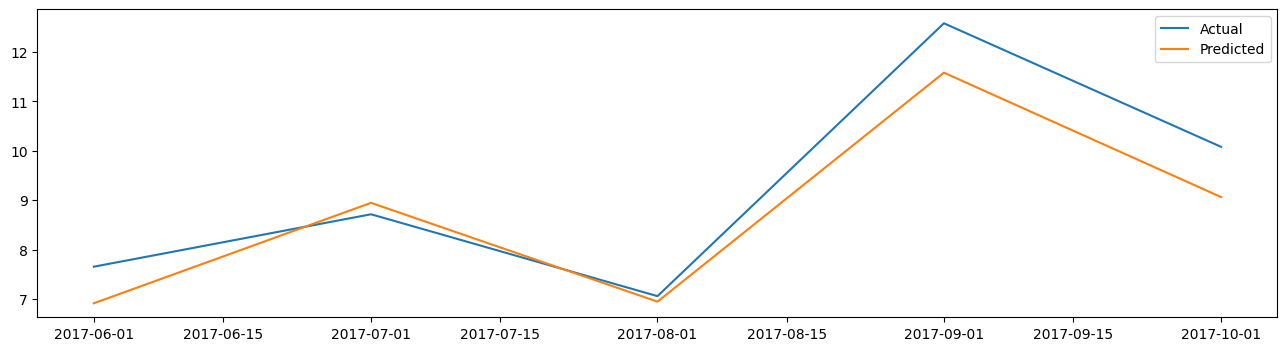

In [24]:
next_5 = results.forecast(steps = 5)
plt.figure(figsize=(16,4))
plt.plot(y['2017-06-01':'2017-10-01'],label='Actual')
plt.plot(next_5, label="Predicted")
plt.legend()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [17]:
rmse = sqrt(mean_squared_error(train_data, predictions))
mae = mean_absolute_error(train_data, predictions)
rmse1 = sqrt(mean_squared_error(y['2017-06-01':'2017-10-01'], next_5))
mae1 = mean_absolute_error(y['2017-06-01':'2017-10-01'], next_5)

In [18]:
print('RMSE: ',rmse)
print('RMSE: ',rmse1)
print('MAE: ',mae)
print('MAR1: ',mae1)

RMSE:  3.207966097207175
RMSE:  0.7283072514511042
MAE:  2.245313157359786
MAR1:  0.6205269127519664


In [19]:
next_5

2017-06-01     6.911195
2017-07-01     8.945858
2017-08-01     6.943808
2017-09-01    11.582963
2017-10-01     9.062035
Freq: MS, Name: predicted_mean, dtype: float64

In [20]:
y['2017-06-01':'2017-10-01']

Order Date
2017-06-01     7.652174
2017-07-01     8.714286
2017-08-01     7.055556
2017-09-01    12.583333
2017-10-01    10.080000
Freq: MS, Name: Quantity, dtype: float64

In [21]:
import pickle
filename = 'demand_furniture.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as", filename)

Model saved successfully as demand_furniture.pkl
